# **Stock Price Prediction and Analysis using different Regression models**

In [77]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

%matplotlib inline

In [153]:
# Reading the CSV file

df = pd.read_csv('C:\\Users\\Ritesh\\OneDrive\\Desktop\\ML Project\\rilo.csv')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477992,48051995.0
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396511,77875009.0
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475447,96602936.0
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378685,100099436.0
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307389,76935930.0


In [100]:
#dropping the row with NaN values

df = df.dropna()

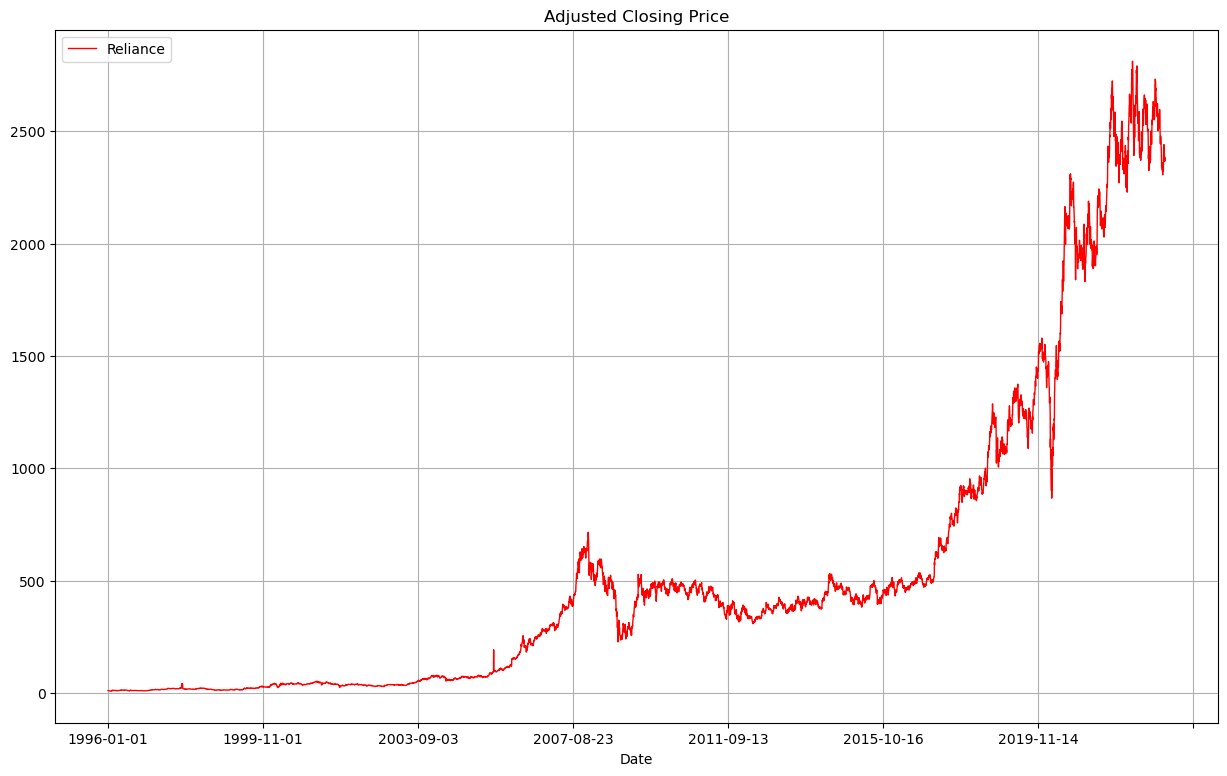

In [136]:
# Visualizing the stock prices

df['Adj Close'].plot(label='Reliance', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [105]:
# Number of days for which to predict the stock prices

predict_days = 30

In [106]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['Adj Close'].shift(-predict_days)
# print(df['Prediction'])
# print(df['Adj Close'])

In [107]:
# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      
#print(X)
print(X.shape)

(6790, 6)


In [108]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]     
# print(y)
print(y.shape)

(6790,)


In [109]:
# Splitting the data into Training data & Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5432, 6)
(5432,)
(1358, 6)
(1358,)


## 1. Linear Regression
Building First model of regression - Linear Regression

In [110]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  

LinearRegression()

In [133]:
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score*100)

Linear Model score: 98.61592337561864


In [115]:
# Define the Real & Prediction Values

X_predict = np.array(df.drop(labels=['Prediction'], axis=1))[-predict_days:]
linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(labels=['Prediction'], axis=1)))

In [116]:
# Defining some Parameters

predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

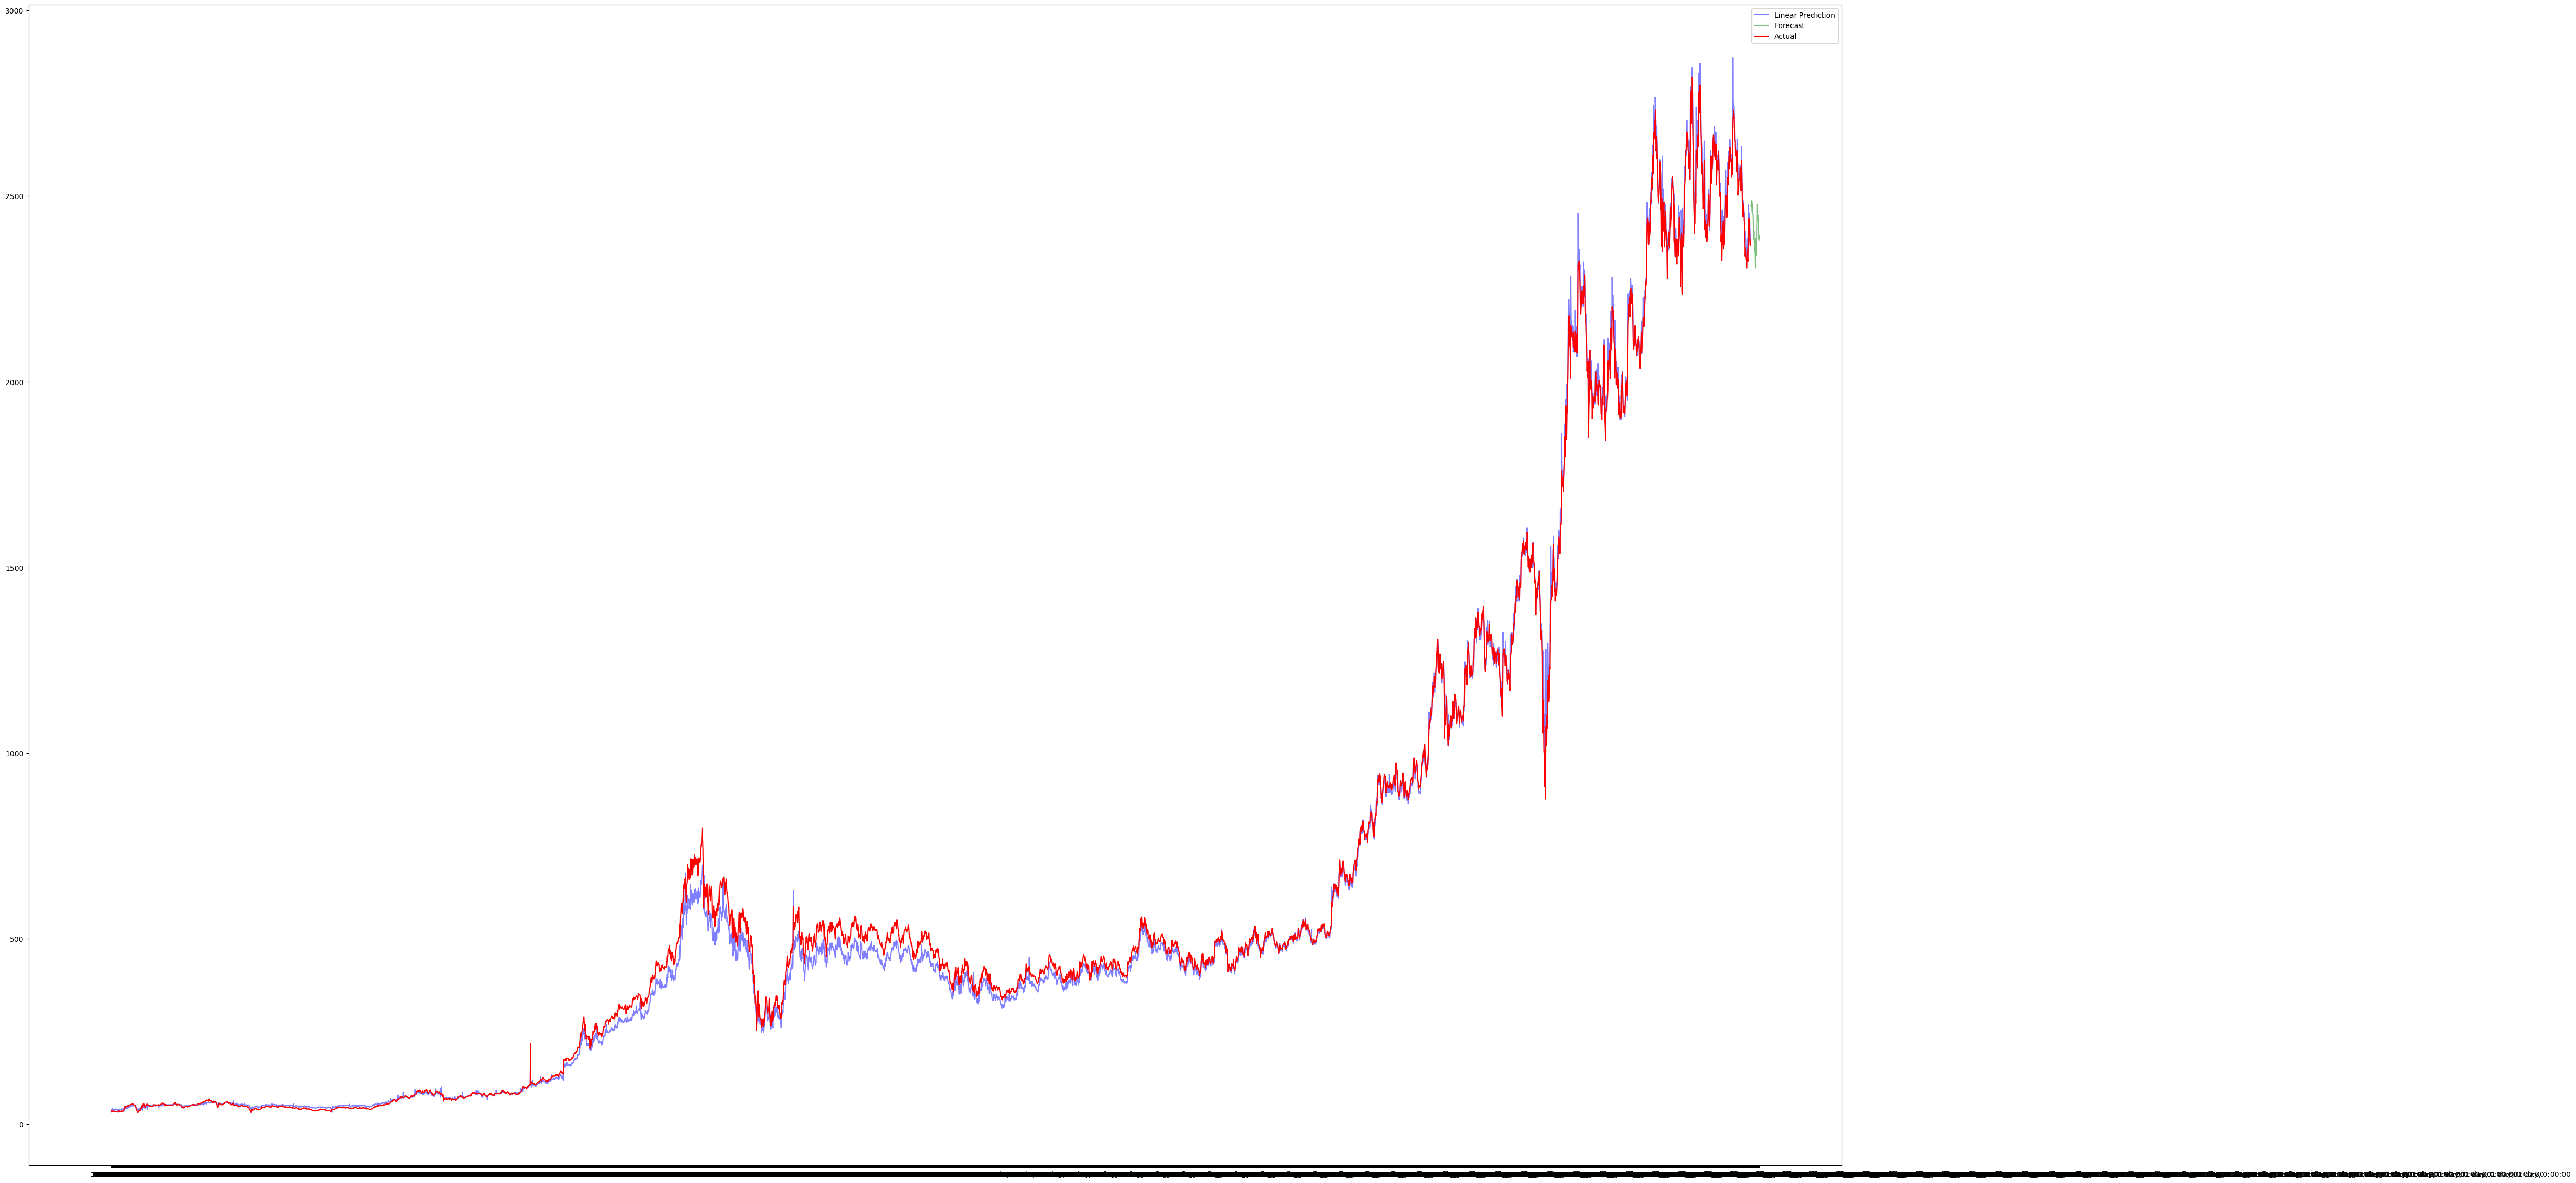

In [119]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(45, 30))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

## 2. Ridge Regression
Building Second model of regression - Ridge Regression

In [120]:
# Defining the Ridge Regression Model

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)   

Ridge()

In [134]:
# Score of the Ridge Regression Model (Using the Test Data)

ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score*100)

Ridge Model score: 98.61592334387997


In [124]:
# Define the Real & Prediction Values

ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(columns=['Prediction'])))

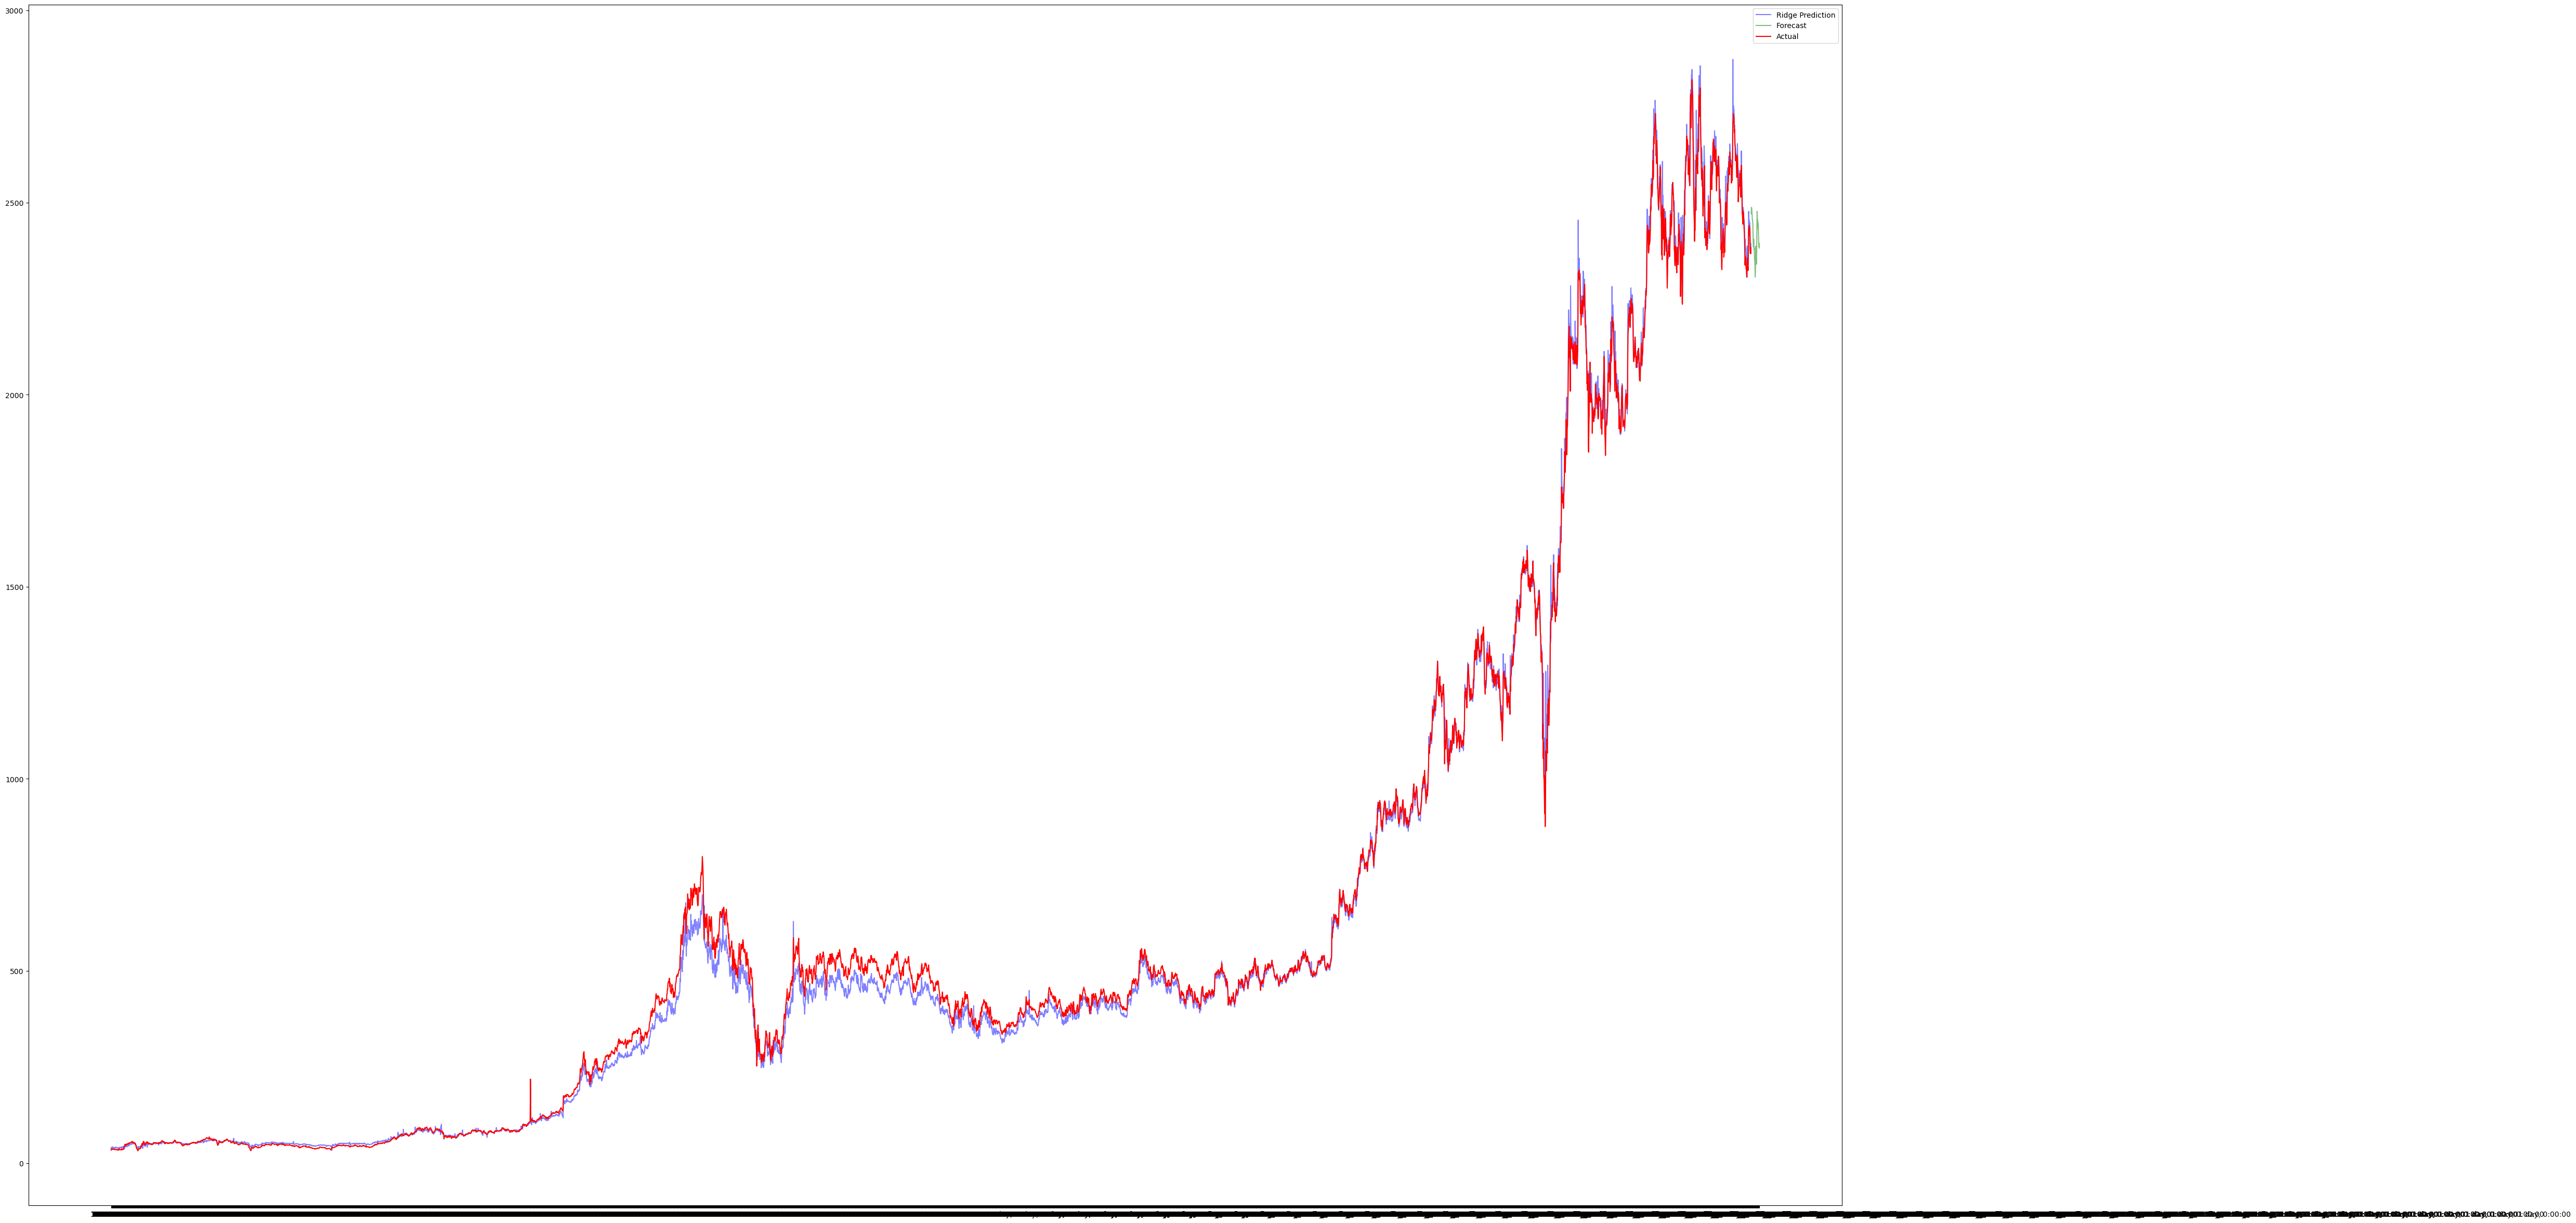

In [126]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(45, 30))
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

## 3. Lasso Regression
Building Third model of regression - Lasso Regression

In [127]:
# Defining the Lasso Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+07, tolerance: 2.505e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [135]:
# Score of the Lasso Regression Model (Using the Test Data)

lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score*100)

Lasso Model score: 98.56776257980216


In [130]:
# Define the Real & Prediction Values

lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], axis=1)))

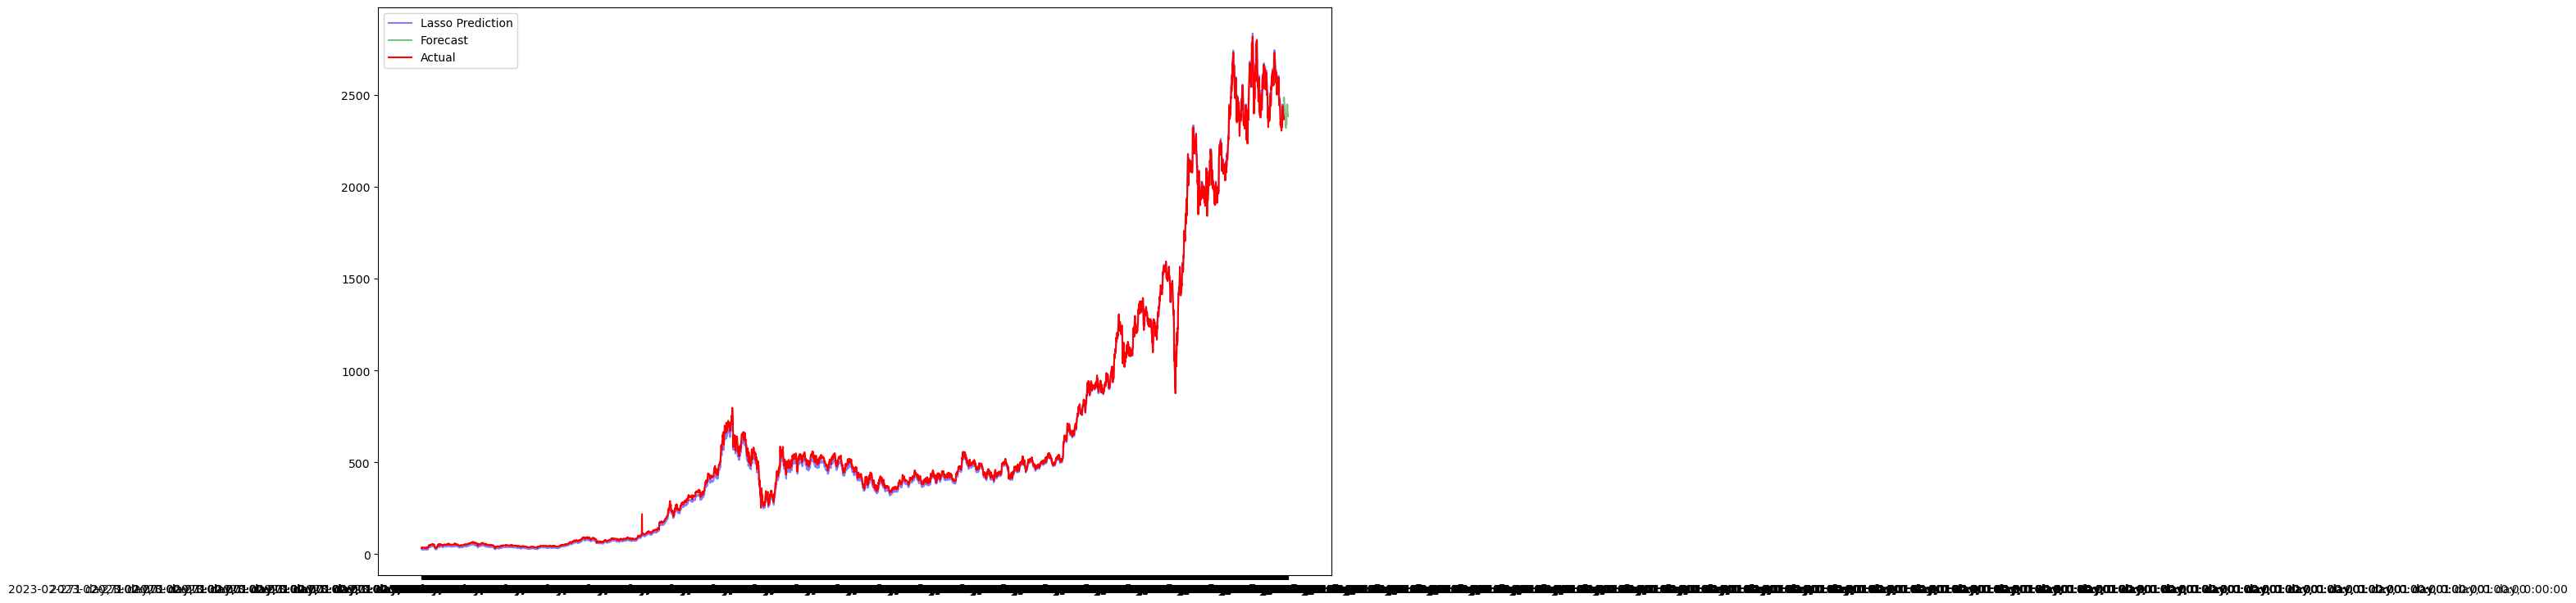

In [131]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(45, 30))
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)
plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

# Best Performance of the Regressor Models

In [151]:
# Best Performance of the Regressor Models

best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Linear Regression Model with the score of 98.61592337561864%.


# LSTM

In [146]:
# Prepare the data
data = df.filter(['Adj Close'])
dataset = data.values
training_data_len = int(np.ceil(0.8*len(dataset)))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Reshape the data to fit the model
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data
test_data = scaled_data[training_data_len - 60: , :]

# Split the data into x_test and y_test datasets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Reshape the data to fit the model
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)


43/43 [==============================] - 3s 32ms/step
Root Mean Squared Error: 98.18062277037893


C:\Windows\Temp\ipykernel_21344\1374798128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predictions


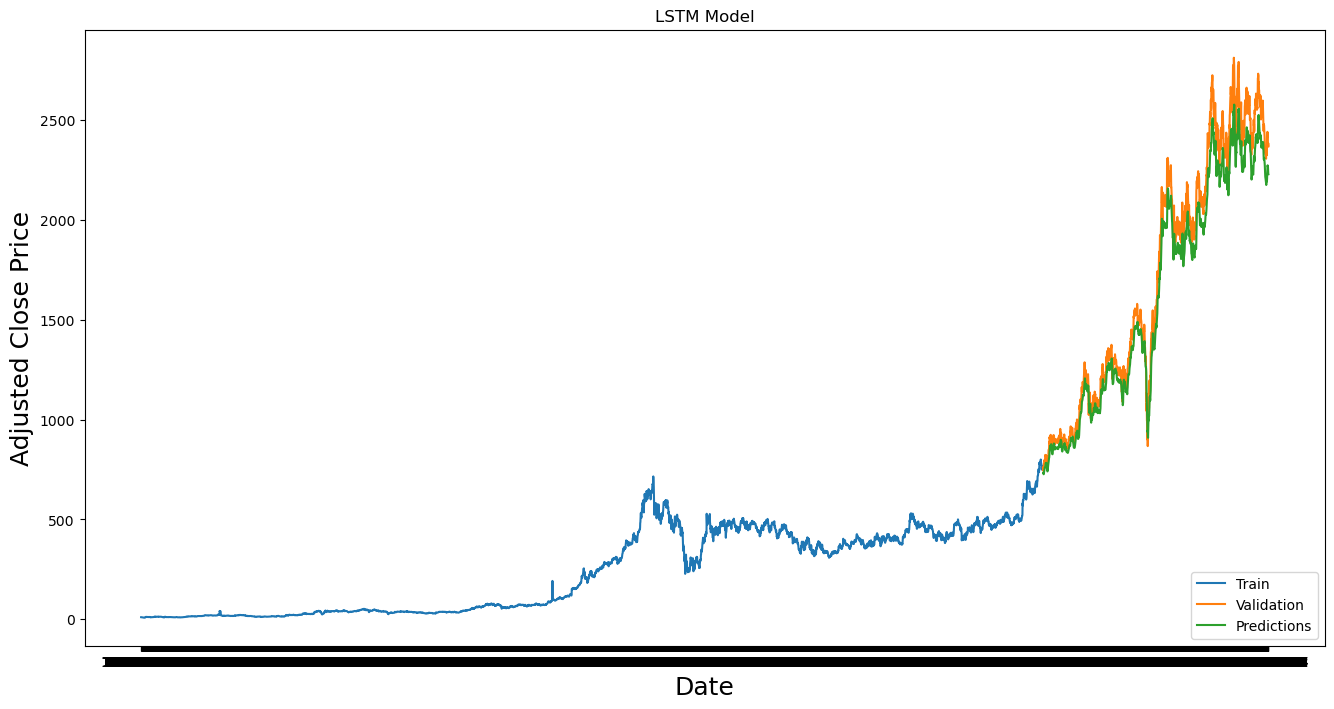

In [149]:
# Add predictions to the validation data
valid.loc[:, 'Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()